In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/travel-behavior-insights/sample_submission.csv
/kaggle/input/travel-behavior-insights/train.csv
/kaggle/input/travel-behavior-insights/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/travel-behavior-insights/train.csv")

In [41]:
train_df.describe()

,num_females,num_males,mainland_stay_nights,island_stay_nights,spend_category
count,12652.000000,12650.000000,12654.000000,12654.000000,12620.000000
mean,0.943724,1.009407,9.205073,2.516833,0.621157
std,1.268167,1.234850,14.548536,5.132266,0.683645
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000,1.000000
75%,1.000000,1.000000,11.000000,4.000000,1.000000
max,49.000000,58.000000,365.000000,240.000000,2.000000


In [42]:
train_df.shape

(12654, 25)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   trip_id                      12654 non-null  object 
 1   country                      12424 non-null  object 
 2   age_group                    12646 non-null  object 
 3   travel_companions            11917 non-null  object 
 4   num_females                  12652 non-null  float64
 5   num_males                    12650 non-null  float64
 6   main_activity                12526 non-null  object 
 7   visit_purpose                12654 non-null  object 
 8   is_first_visit               12555 non-null  object 
 9   mainland_stay_nights         12654 non-null  int64  
 10  island_stay_nights           12654 non-null  int64  
 11  tour_type                    12654 non-null  object 
 12  intl_transport_included      12507 non-null  object 
 13  info_source     

In [44]:
train_df.isnull().sum() / train_df.shape[0] * 100

trip_id                         0.000000
country                         1.817607
age_group                       0.063221
travel_companions               5.824245
num_females                     0.015805
num_males                       0.031611
main_activity                   1.011538
visit_purpose                   0.000000
is_first_visit                  0.782361
mainland_stay_nights            0.000000
island_stay_nights              0.000000
tour_type                       0.000000
intl_transport_included         1.161688
info_source                     0.000000
accomodation_included           1.130077
food_included                   1.351351
domestic_transport_included     0.000000
sightseeing_included            0.000000
guide_included                  0.000000
insurance_included              1.865023
days_booked_before_trip        12.272799
arrival_weather                26.892682
total_trip_days                 3.176861
has_special_requirements       64.145725
spend_category  

In [45]:
train_df.head()

,trip_id,country,age_group,travel_companions,num_females,num_males,main_activity,visit_purpose,is_first_visit,mainland_stay_nights,...,food_included,domestic_transport_included,sightseeing_included,guide_included,insurance_included,days_booked_before_trip,arrival_weather,total_trip_days,has_special_requirements,spend_category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0


In [46]:
train_df['arrival_weather'] = train_df['arrival_weather'].str.strip().str.replace(',', '', regex=False)
train_df['main_activity'] = train_df['main_activity'].str.strip().replace({'Widlife Tourism':'Wildlife Tourism'})

binary_cols = [
    'is_first_visit','intl_transport_included','accomodation_included',
    'food_included','domestic_transport_included','sightseeing_included',
    'guide_included','insurance_included'
]
for col in binary_cols:
    train_df[col] = train_df[col].fillna('No').map({'Yes':1, 'No':0}).astype(int)

cat_fill = {
    'country':'Unknown',
    'travel_companions':'Unknown',
    'main_activity':'Unknown',
    'arrival_weather':'Unknown',
    'days_booked_before_trip':'Unknown',
    'total_trip_days':'Unknown',
}
train_df.fillna(cat_fill, inplace=True)

train_df['has_special_requirements'] = (
    train_df['has_special_requirements']
    .fillna('none')
    .replace({'NaN':'none', 'nan':'none', np.nan:'none'})
)

train_df[['num_females','num_males']] = train_df[['num_females','num_males']].fillna(0)

train_df['total_group_size'] = train_df['num_females'] + train_df['num_males']
train_df['has_island_stay'] = (train_df['island_stay_nights']>0).astype(int)
train_df['total_stay_nights'] = train_df['mainland_stay_nights'] + train_df['island_stay_nights']


In [47]:
train_df.head()

,trip_id,country,age_group,travel_companions,num_females,num_males,main_activity,visit_purpose,is_first_visit,mainland_stay_nights,...,guide_included,insurance_included,days_booked_before_trip,arrival_weather,total_trip_days,has_special_requirements,spend_category,total_group_size,has_island_stay,total_stay_nights
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,1,0,...,0,0,Unknown,cloudy,30+,none,1.0,3.0,1,7
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,1,6,...,0,0,15-30,sunny,30+,none,2.0,1.0,0,6
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,0,4,...,0,0,90+,sunny,30+,none,2.0,2.0,1,6
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Wildlife Tourism,Leisure and Holidays,1,0,...,1,0,8-14,Unknown,Unknown,none,0.0,2.0,1,7
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,1,0,...,0,0,90+,sunny,7-14,none,0.0,2.0,1,7


In [48]:
train_df.isnull().sum().sort_values(ascending=False) / train_df.shape[0] * 100

spend_category                 0.268690
age_group                      0.063221
trip_id                        0.000000
food_included                  0.000000
has_island_stay                0.000000
total_group_size               0.000000
has_special_requirements       0.000000
total_trip_days                0.000000
arrival_weather                0.000000
days_booked_before_trip        0.000000
insurance_included             0.000000
guide_included                 0.000000
sightseeing_included           0.000000
domestic_transport_included    0.000000
accomodation_included          0.000000
country                        0.000000
info_source                    0.000000
intl_transport_included        0.000000
tour_type                      0.000000
island_stay_nights             0.000000
mainland_stay_nights           0.000000
is_first_visit                 0.000000
visit_purpose                  0.000000
main_activity                  0.000000
num_males                      0.000000


In [49]:
train_df = train_df.dropna(subset=['spend_category']).reset_index(drop=True)

In [50]:
train_df['spend_category'].isnull().sum()

0

In [51]:
train_df['age_group'] = train_df['age_group'].fillna('Unknown')

In [52]:
train_df.head()

,trip_id,country,age_group,travel_companions,num_females,num_males,main_activity,visit_purpose,is_first_visit,mainland_stay_nights,...,guide_included,insurance_included,days_booked_before_trip,arrival_weather,total_trip_days,has_special_requirements,spend_category,total_group_size,has_island_stay,total_stay_nights
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,1,0,...,0,0,Unknown,cloudy,30+,none,1.0,3.0,1,7
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,1,6,...,0,0,15-30,sunny,30+,none,2.0,1.0,0,6
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,0,4,...,0,0,90+,sunny,30+,none,2.0,2.0,1,6
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Wildlife Tourism,Leisure and Holidays,1,0,...,1,0,8-14,Unknown,Unknown,none,0.0,2.0,1,7
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,1,0,...,0,0,90+,sunny,7-14,none,0.0,2.0,1,7


In [53]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'country','age_group','travel_companions','main_activity',
    'visit_purpose','tour_type','info_source',
    'arrival_weather','has_special_requirements'
]

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    encoders[col] = le

In [54]:
train_df[cat_cols].head()

,country,age_group,travel_companions,main_activity,visit_purpose,tour_type,info_source,arrival_weather,has_special_requirements
0,37,2,5,0,1,0,3,4,1
1,54,2,0,3,3,0,4,7,1
2,99,1,3,4,3,0,0,7,1
3,50,1,4,9,1,1,7,2,1
4,50,1,4,0,1,1,7,7,1


In [55]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'num_females','num_males',
    'mainland_stay_nights','island_stay_nights',
    'total_group_size','total_stay_nights'
]

scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

In [56]:
train_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
num_females,12620.0,6.756349e-18,1.00004,-0.743712,-0.743712,0.044203,0.044203,37.864122
num_males,12620.0,-3.434478e-17,1.00004,-0.816683,-0.007629,-0.007629,-0.007629,46.108452
mainland_stay_nights,12620.0,7.206773e-17,1.00004,-0.632134,-0.426083,-0.220032,0.123386,24.437368
island_stay_nights,12620.0,-7.882408e-18,1.00004,-0.490401,-0.490401,-0.490401,0.288268,46.229748
total_group_size,12620.0,3.490780e-17,1.00004,-0.917169,-0.447627,0.021914,0.021914,42.750206
total_stay_nights,12620.0,4.222718e-17,1.00004,-0.718255,-0.450318,-0.249365,0.152541,24.065934


In [57]:
# Replace string "Nan" with actual np.nan
train_df['days_booked_before_trip'] = train_df['days_booked_before_trip'].replace(['Nan', 'nan', 'NaN'], np.nan)
train_df['total_trip_days'] = train_df['total_trip_days'].replace(['Nan', 'nan', 'NaN'], np.nan)

# Fill real NaNs with "Unknown" before mapping
train_df['days_booked_before_trip'] = train_df['days_booked_before_trip'].fillna('Unknown')
train_df['total_trip_days'] = train_df['total_trip_days'].fillna('Unknown')

# Clean extra characters
for col in ['days_booked_before_trip','total_trip_days']:
    train_df[col] = train_df[col].str.strip().str.replace(',', '', regex=False)

# Remap
train_df['days_booked_before_trip'] = train_df['days_booked_before_trip'].map({
    '0-7':0, '8-14':1, '15-30':2, '31-60':3, '61-90':4, '90+':5, 'Unknown':-1
}).fillna(-1)

train_df['total_trip_days'] = train_df['total_trip_days'].map({
    '1-3':0, '4-6':1, '7-14':2, '15-29':3, '30+':4, 'Unknown':-1
}).fillna(-1)


In [58]:
train_df[['days_booked_before_trip','total_trip_days']].head()

,days_booked_before_trip,total_trip_days
0,-1.0,4.0
1,2.0,4.0
2,5.0,4.0
3,1.0,-1.0
4,5.0,2.0


In [59]:
train_df['days_booked_before_trip'].unique()


array([-1.,  2.,  5.,  1.,  4.,  3.])

In [60]:
X = train_df.drop(columns=['trip_id', 'spend_category'])
y = train_df['spend_category'].astype(int)

In [61]:
X.shape, y.shape

((12620, 26), (12620,))

In [63]:
X.columns

Index(['country', 'age_group', 'travel_companions', 'num_females', 'num_males',
       'main_activity', 'visit_purpose', 'is_first_visit',
       'mainland_stay_nights', 'island_stay_nights', 'tour_type',
       'intl_transport_included', 'info_source', 'accomodation_included',
       'food_included', 'domestic_transport_included', 'sightseeing_included',
       'guide_included', 'insurance_included', 'days_booked_before_trip',
       'arrival_weather', 'total_trip_days', 'has_special_requirements',
       'total_group_size', 'has_island_stay', 'total_stay_nights'],
      dtype='object')

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12620 entries, 0 to 12619
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      12620 non-null  int64  
 1   age_group                    12620 non-null  int64  
 2   travel_companions            12620 non-null  int64  
 3   num_females                  12620 non-null  float64
 4   num_males                    12620 non-null  float64
 5   main_activity                12620 non-null  int64  
 6   visit_purpose                12620 non-null  int64  
 7   is_first_visit               12620 non-null  int64  
 8   mainland_stay_nights         12620 non-null  float64
 9   island_stay_nights           12620 non-null  float64
 10  tour_type                    12620 non-null  int64  
 11  intl_transport_included      12620 non-null  int64  
 12  info_source                  12620 non-null  int64  
 13  accomodation_inc

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [67]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10096, 26), (2524, 26), (10096,), (2524,))

In [68]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
val_ds = TensorDataset(X_val_tensor, y_val_tensor)

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256)


In [69]:
for xb, yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([64, 26]) torch.Size([64])


In [70]:
import torch.nn as nn

class TripANN(nn.Module):
    def __init__(self, input_dim, hidden1=128, hidden2=64, dropout=0.3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.BatchNorm1d(hidden1),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden1, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden2, 3)   # 3 spend categories
        )

    def forward(self, x):
        return self.net(x)

In [71]:
model = TripANN(input_dim=X_train.shape[1])

In [72]:
sum(p.numel() for p in model.parameters())

12291

In [73]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()          # multi-class classification loss
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [74]:
next(model.parameters()).device

device(type='cpu')

In [75]:
from torch.utils.data import DataLoader
import numpy as np

def train_model(model, train_dl, val_dl, criterion, optimizer, epochs=20):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for xb, yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * xb.size(0)
        
        # Compute validation metrics
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for xb, yb in val_dl:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                loss = criterion(outputs, yb)
                val_loss += loss.item() * xb.size(0)
                _, preds = torch.max(outputs, 1)
                correct += (preds == yb).sum().item()
                total += yb.size(0)
        
        train_loss = running_loss / len(train_dl.dataset)
        val_loss = val_loss / len(val_dl.dataset)
        val_acc = correct / total * 100
        
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

In [76]:
train_model(model, train_dl, val_dl, criterion, optimizer, epochs=25)

Epoch [1/25] | Train Loss: 0.8042 | Val Loss: 0.6717 | Val Acc: 72.07%
Epoch [2/25] | Train Loss: 0.6836 | Val Loss: 0.6324 | Val Acc: 73.06%
Epoch [3/25] | Train Loss: 0.6679 | Val Loss: 0.6232 | Val Acc: 73.69%
Epoch [4/25] | Train Loss: 0.6566 | Val Loss: 0.6275 | Val Acc: 73.61%
Epoch [5/25] | Train Loss: 0.6524 | Val Loss: 0.6136 | Val Acc: 74.13%
Epoch [6/25] | Train Loss: 0.6459 | Val Loss: 0.6237 | Val Acc: 73.57%
Epoch [7/25] | Train Loss: 0.6430 | Val Loss: 0.6124 | Val Acc: 73.73%
Epoch [8/25] | Train Loss: 0.6449 | Val Loss: 0.6112 | Val Acc: 74.09%
Epoch [9/25] | Train Loss: 0.6412 | Val Loss: 0.6104 | Val Acc: 74.29%
Epoch [10/25] | Train Loss: 0.6377 | Val Loss: 0.6087 | Val Acc: 74.29%
Epoch [11/25] | Train Loss: 0.6349 | Val Loss: 0.6072 | Val Acc: 74.21%
Epoch [12/25] | Train Loss: 0.6278 | Val Loss: 0.6036 | Val Acc: 74.13%
Epoch [13/25] | Train Loss: 0.6299 | Val Loss: 0.6064 | Val Acc: 73.57%
Epoch [14/25] | Train Loss: 0.6298 | Val Loss: 0.6062 | Val Acc: 73.93%
E

In [84]:
test_df = pd.read_csv("/kaggle/input/travel-behavior-insights/test.csv")

In [85]:
test_df.isnull().sum()

trip_id                           0
country                         126
age_group                         0
travel_companions               338
num_females                       0
num_males                         2
main_activity                    65
visit_purpose                     0
is_first_visit                   39
mainland_stay_nights              0
island_stay_nights                0
tour_type                         0
intl_transport_included          57
info_source                       0
accomodation_included            62
food_included                    78
domestic_transport_included       0
sightseeing_included              0
guide_included                    0
insurance_included              107
days_booked_before_trip         667
arrival_weather                1593
total_trip_days                 153
has_special_requirements       3726
dtype: int64

In [78]:
test_df = pd.read_csv("/kaggle/input/travel-behavior-insights/test.csv")

test_df['arrival_weather'] = test_df['arrival_weather'].astype(str).str.strip().str.replace(',', '', regex=False)
test_df['main_activity'] = test_df['main_activity'].astype(str).str.strip().replace({'Widlife Tourism':'Wildlife Tourism'})

for col in binary_cols:
    test_df[col] = test_df[col].fillna('No').map({'Yes':1, 'No':0}).astype(int)

test_df.fillna(cat_fill, inplace=True)
test_df['has_special_requirements'] = (
    test_df['has_special_requirements']
    .fillna('none')
    .replace({'NaN':'none','nan':'none',np.nan:'none'})
)

test_df[['num_females','num_males']] = test_df[['num_females','num_males']].fillna(0)
test_df['total_group_size'] = test_df['num_females'] + test_df['num_males']
test_df['has_island_stay'] = (test_df['island_stay_nights']>0).astype(int)
test_df['total_stay_nights'] = test_df['mainland_stay_nights'] + test_df['island_stay_nights']

for col in cat_cols:
    test_df[col] = test_df[col].map(lambda x: x if x in encoders[col].classes_ else 'Unknown')
    test_df[col] = encoders[col].transform(test_df[col])

test_df[num_cols] = scaler.transform(test_df[num_cols])

for col in ['days_booked_before_trip','total_trip_days']:
    test_df[col] = test_df[col].astype(str).str.strip().str.replace(',', '', regex=False)

test_df['days_booked_before_trip'] = test_df['days_booked_before_trip'].map({
    '0-7':0,'8-14':1,'15-30':2,'31-60':3,'61-90':4,'90+':5,'Unknown':-1
}).fillna(-1)

test_df['total_trip_days'] = test_df['total_trip_days'].map({
    '1-3':0,'4-6':1,'7-14':2,'15-29':3,'30+':4,'Unknown':-1
}).fillna(-1)


In [79]:
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(test_df.drop(columns=['trip_id']).values, dtype=torch.float32).to(device)
    outputs = model(X_test_tensor)
    _, preds = torch.max(outputs, 1)
    test_df['spend_category'] = preds.cpu().numpy()


In [83]:
test_df.isnull().sum()

trip_id                        0
country                        0
age_group                      0
travel_companions              0
num_females                    0
num_males                      0
main_activity                  0
visit_purpose                  0
is_first_visit                 0
mainland_stay_nights           0
island_stay_nights             0
tour_type                      0
intl_transport_included        0
info_source                    0
accomodation_included          0
food_included                  0
domestic_transport_included    0
sightseeing_included           0
guide_included                 0
insurance_included             0
days_booked_before_trip        0
arrival_weather                0
total_trip_days                0
has_special_requirements       0
total_group_size               0
has_island_stay                0
total_stay_nights              0
spend_category                 0
dtype: int64

In [80]:
submission = test_df[['trip_id', 'spend_category']]
submission.to_csv("submission.csv", index=False)

In [81]:
submission

,trip_id,spend_category
0,tour_id8gzpck76,1
1,tour_idow1zxkou,0
2,tour_idue7esfqz,0
3,tour_idnj3mjzpb,0
4,tour_ida3us5yk2,0
...,...,...
5847,tour_id0bnf9xcp,1
5848,tour_idqfcw3991,0
5849,tour_idrarc7v2s,1
5850,tour_idvuu6dqrf,2


In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from torch.utils.data import Dataset, DataLoader

In [5]:
df_train = pd.read_csv("/kaggle/input/travel-behavior-insights/train.csv")
df_test = pd.read_csv("/kaggle/input/travel-behavior-insights/test.csv")

# Clean target
df_train.dropna(subset=['spend_category'], inplace=True)
df_train['spend_category'] = df_train['spend_category'].astype(int)
test_trip_ids = df_test['trip_id']

X_train = df_train.drop(['trip_id', 'spend_category'], axis=1)
y_train = df_train['spend_category']
X_test = df_test.drop(['trip_id'], axis=1)

# --- 2. Ordinal + Categorical Handling ---
print("Preprocessing features...")

age_map = {'15-24': 1, '25-44': 2, '45-64': 3, '65+': 4, 'Missing': 0}
booked_map = {'0-7': 1, '8-14': 2, '15-30': 3, '31-60': 4, '61-90': 5, '90+': 6, 'Missing': 0}
days_map = {'1-3': 1, '4-6': 2, '7-14': 3, '15-30': 4, '30+': 5, 'Missing': 0}

ordinal_cols = ['age_group', 'days_booked_before_trip', 'total_trip_days']
map_list = [age_map, booked_map, days_map]

for df in [X_train, X_test]:
    # Numeric fill
    for col in ['num_females', 'num_males']:
        df[col] = df[col].fillna(df_train[col].median())
    # Ordinal mapping
    for col, mapping in zip(ordinal_cols, map_list):
        df[col] = df[col].fillna('Missing').map(mapping).fillna(0).astype(int)
    # Remaining categorical
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].fillna('Missing')

# --- 3. One-Hot Encoding + Scaling ---
print("Encoding and scaling...")
X_combined = pd.concat([X_train, X_test], ignore_index=True)
object_cols = X_train.select_dtypes('object').columns.tolist()

X_combined = pd.get_dummies(X_combined, columns=object_cols, drop_first=False)

X_train_proc = X_combined.iloc[:len(X_train)]
X_test_proc = X_combined.iloc[len(X_train):]
X_test_proc = X_test_proc.reindex(columns=X_train_proc.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_proc)
X_test_scaled = scaler.transform(X_test_proc)

# --- 4. Train/Val Split ---
X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42)

# --- 5. Torch Dataset ---
class TripDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long) if y is not None else None
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

train_ds = TripDataset(X_tr, y_tr)
val_ds = TripDataset(X_val, y_val)
test_ds = TripDataset(X_test_scaled)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)

# --- 6. ANN Model ---
class ANN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.net(x)



Preprocessing features...
Encoding and scaling...


In [6]:

input_dim = X_train_scaled.shape[1]
output_dim = len(np.unique(y_train))
model = ANN(input_dim, output_dim)

# --- 7. Training Setup ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- 8. Training Loop ---
print("Training ANN...")
best_val_f1 = 0
patience, patience_counter = 10, 0

for epoch in range(100):
    model.train()
    train_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_preds, val_true = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            out = model(Xb)
            preds = torch.argmax(out, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_true.extend(yb.cpu().numpy())

    val_f1 = f1_score(val_true, val_preds, average='weighted')
    print(f"Epoch {epoch+1:03d} | Loss: {train_loss/len(train_loader):.4f} | Val F1: {val_f1:.4f}")

    # Early stopping
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), "best_ann.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# --- 9. Inference ---
print("\nGenerating predictions...")
model.load_state_dict(torch.load("best_ann.pth"))
model.eval()

preds = []
with torch.no_grad():
    for Xb in test_loader:
        Xb = Xb.to(device)
        out = model(Xb)
        preds.extend(torch.argmax(out, dim=1).cpu().numpy())

submission = pd.DataFrame({
    "trip_id": test_trip_ids,
    "spend_category": preds
})
submission.to_csv("ann_submission.csv", index=False)
print("Submission file saved as ann_submission.csv")

Training ANN...
Epoch 001 | Loss: 0.6813 | Val F1: 0.7363
Epoch 002 | Loss: 0.6092 | Val F1: 0.7420
Epoch 003 | Loss: 0.5922 | Val F1: 0.7470
Epoch 004 | Loss: 0.5727 | Val F1: 0.7462
Epoch 005 | Loss: 0.5608 | Val F1: 0.7450
Epoch 006 | Loss: 0.5550 | Val F1: 0.7449
Epoch 007 | Loss: 0.5425 | Val F1: 0.7432
Epoch 008 | Loss: 0.5339 | Val F1: 0.7423
Epoch 009 | Loss: 0.5278 | Val F1: 0.7448
Epoch 010 | Loss: 0.5173 | Val F1: 0.7462
Epoch 011 | Loss: 0.5083 | Val F1: 0.7366
Epoch 012 | Loss: 0.5038 | Val F1: 0.7382
Epoch 013 | Loss: 0.4917 | Val F1: 0.7337
Early stopping triggered.

Generating predictions...
Submission file saved as ann_submission.csv


Top correlations with spend_category:
spend_category                 1.000000
total_trip_days                0.002477
days_booked_before_trip       -0.002699
mainland_stay_nights          -0.016573
num_males                     -0.098994
island_stay_nights            -0.198222
age_group                     -0.207529
num_females                   -0.217186
insurance_included            -0.292674
is_first_visit                -0.321429
sightseeing_included          -0.435915
guide_included                -0.454179
intl_transport_included       -0.486751
domestic_transport_included   -0.533821
food_included                 -0.568235
Name: spend_category, dtype: float64

Lowest correlations:
num_females                   -0.217186
insurance_included            -0.292674
is_first_visit                -0.321429
sightseeing_included          -0.435915
guide_included                -0.454179
intl_transport_included       -0.486751
domestic_transport_included   -0.533821
food_included          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


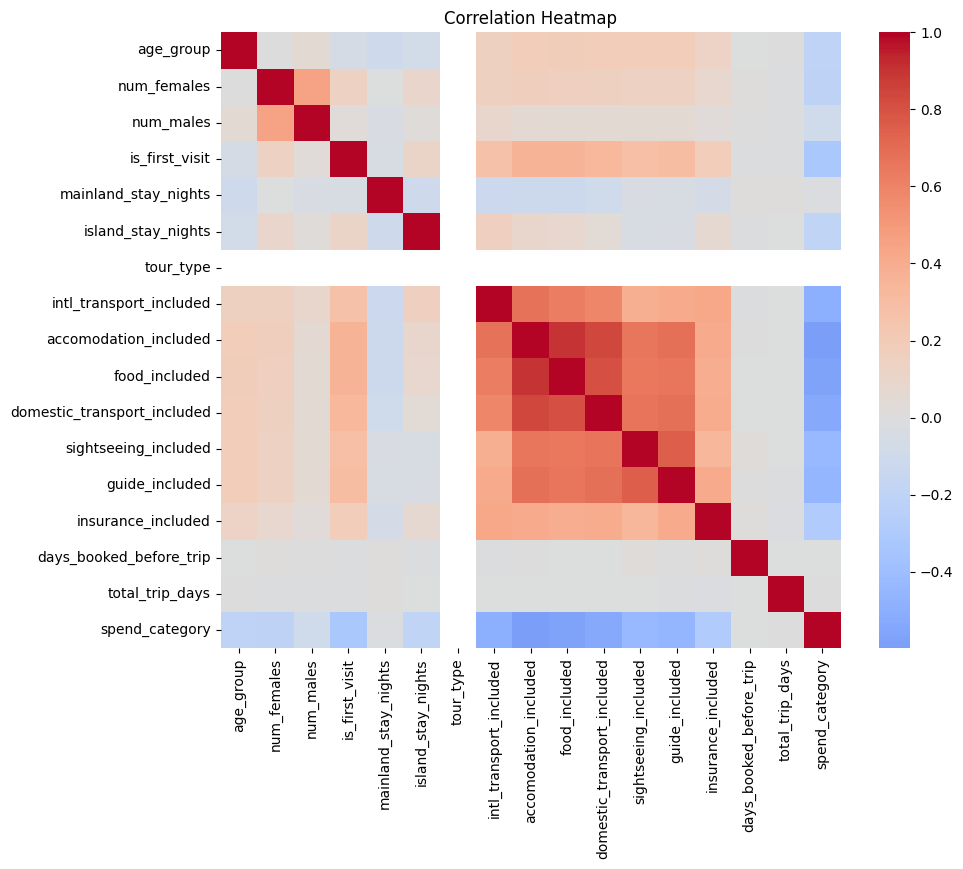

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is already loaded
df = df_train.copy()

# Drop trip_id since it's an identifier
df = df.drop(columns=['trip_id'])

# Convert target to int
df['spend_category'] = df['spend_category'].astype(int)

# Convert ordinal columns to numeric using your mapping
age_map = {'15-24': 1, '25-44': 2, '45-64': 3, '65+': 4, 'Missing': 0}
booked_map = {'0-7': 1, '8-14': 2, '15-30': 3, '31-60': 4, '61-90': 5, '90+': 6, 'Missing': 0}
days_map = {'1-3': 1, '4-6': 2, '7-14': 3, '15-30': 4, '30+': 5, 'Missing': 0}

for col, mapping in zip(['age_group', 'days_booked_before_trip', 'total_trip_days'], [age_map, booked_map, days_map]):
    df[col] = df[col].fillna('Missing').map(mapping).fillna(0).astype(int)

# Convert binary Yes/No features to 0/1
binary_cols = [col for col in df.columns if df[col].dropna().nunique() == 2]
for col in binary_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Missing': 0})

# Compute correlations (numeric only)
corr = df.select_dtypes(include=[np.number]).corr()['spend_category'].sort_values(ascending=False)

print("Top correlations with spend_category:")
print(corr.head(15))
print("\nLowest correlations:")
print(corr.tail(10))

# Visualize heatmap of numeric correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()



country - top 10 categories by mean spend_category:
country
BULGARIA      0.000000
CROATIA       0.000000
COSTARICA     0.000000
VENEZUELA     0.000000
IRAN          0.000000
URUGUAY       0.222222
LUXEMBOURG    0.250000
COLOMBIA      0.250000
TAIWAN        0.250000
AUSTRIA       0.258427
Name: spend_category, dtype: float64


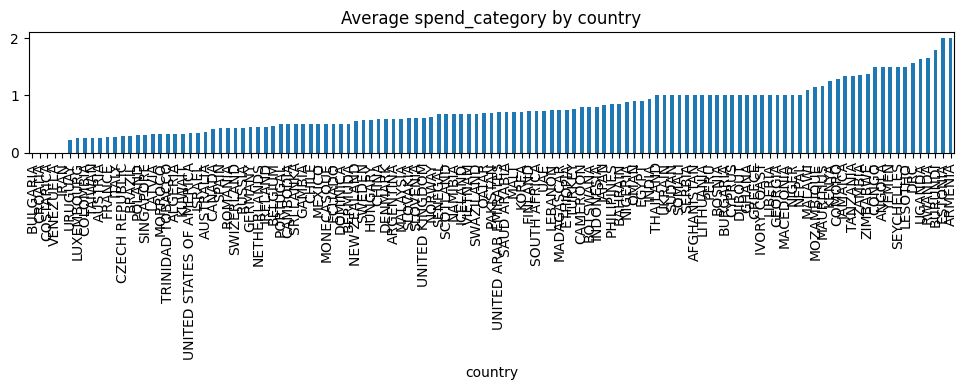


main_activity - top 10 categories by mean spend_category:
main_activity
Widlife Tourism             0.401910
Conference Tourism          0.480696
Business                    0.540107
Wildlife Tourism            0.577293
Beach Tourism               0.605678
Diving and Sport Fishing    0.666667
Bird Tourism                0.892157
Cultural Tourism            0.984177
Mountain Climbing           1.097859
Hunting Tourism             1.252757
Name: spend_category, dtype: float64


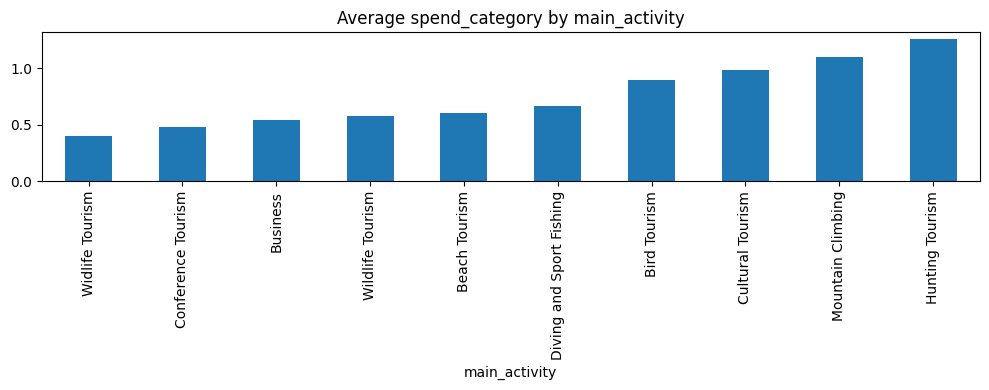


visit_purpose - top 10 categories by mean spend_category:
visit_purpose
Leisure and Holidays              0.346652
Medical                           0.571429
Volunteering                      0.824561
Scientific and Academic           1.028169
Meetings and Conference           1.051519
Visiting Friends and Relatives    1.137886
Business                          1.203435
Other                             1.278846
Name: spend_category, dtype: float64


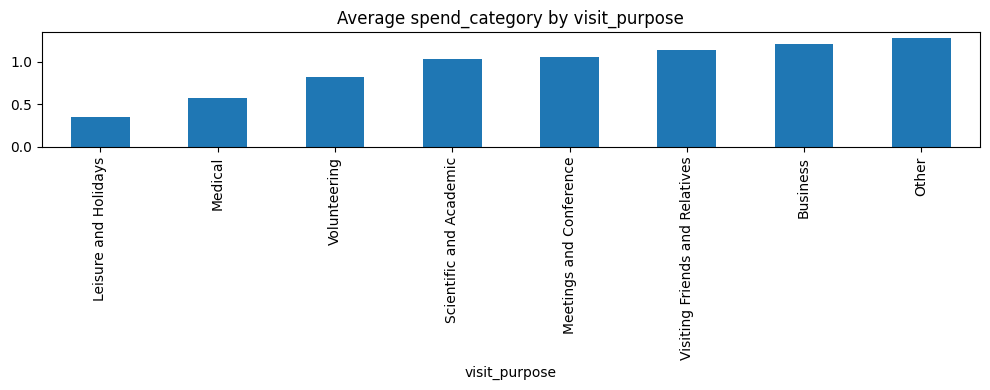


travel_companions - top 10 categories by mean spend_category:
travel_companions
With Spouse and Children        0.226950
With Spouse                     0.259248
With Children                   0.448649
With Other Friends/Relatives    0.546727
Alone                           0.912153
Name: spend_category, dtype: float64


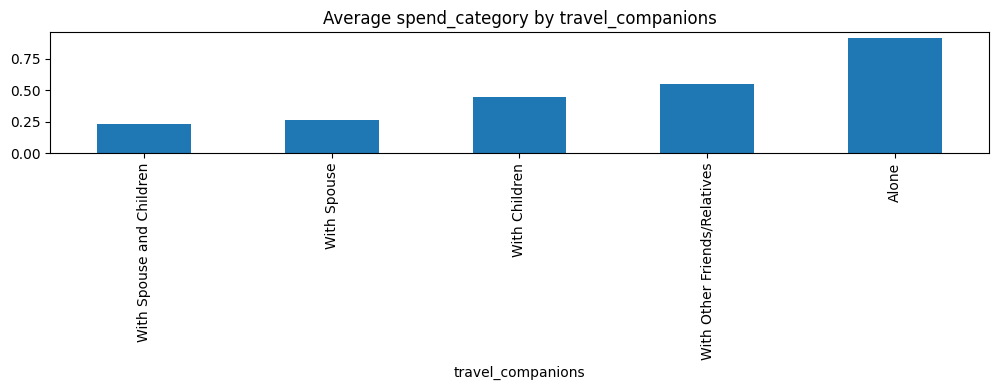

In [8]:
import matplotlib.pyplot as plt

# Compute average spend_category per categorical feature
cat_cols = ['country', 'main_activity', 'visit_purpose', 'travel_companions']

for col in cat_cols:
    mean_spend = df_train.groupby(col)['spend_category'].mean().sort_values()
    print(f"\n{col} - top 10 categories by mean spend_category:")
    print(mean_spend.head(10))
    
    plt.figure(figsize=(10, 4))
    mean_spend.plot(kind='bar')
    plt.title(f"Average spend_category by {col}")
    plt.tight_layout()
    plt.show()


In [9]:
from category_encoders import TargetEncoder

df_train = pd.read_csv("/kaggle/input/travel-behavior-insights/train.csv")
df_test = pd.read_csv("/kaggle/input/travel-behavior-insights/test.csv")

# Drop missing target
df_train.dropna(subset=['spend_category'], inplace=True)
y_train = df_train['spend_category'].astype(int)
X_train = df_train.drop(['trip_id', 'spend_category'], axis=1)
X_test = df_test.drop(['trip_id'], axis=1)

# Fill NaNs for numeric columns
for col in ['num_males', 'num_females']:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)
    X_test[col] = X_test[col].fillna(median_val)

# Ordinal mapping for travel_companions
travel_map = {
    'With Spouse and Children': 1,
    'With Spouse': 2,
    'With Children': 3,
    'With Other Friends/Relatives': 4,
    'Alone': 5,
    'Missing': 0
}
for df in [X_train, X_test]:
    df['travel_companions'] = df['travel_companions'].fillna('Missing').map(travel_map).fillna(0).astype(int)

# Fill missing categorical values
for col in ['country', 'main_activity', 'visit_purpose']:
    X_train[col] = X_train[col].fillna('Missing')
    X_test[col] = X_test[col].fillna('Missing')

# Target Encoding for key categoricals
te_cols = ['country', 'main_activity', 'visit_purpose']
encoder = TargetEncoder(cols=te_cols)
X_train[te_cols] = encoder.fit_transform(X_train[te_cols], y_train)
X_test[te_cols] = encoder.transform(X_test[te_cols])

# Binary yes/no to 0/1
binary_cols = [col for col in X_train.columns if X_train[col].dropna().nunique() == 2]
for col in binary_cols:
    X_train[col] = X_train[col].map({'Yes': 1, 'No': 0, 'Missing': 0})
    X_test[col] = X_test[col].map({'Yes': 1, 'No': 0, 'Missing': 0})

# Fill remaining missing with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [14]:
import pandas as pd

print("Loading data...")
df_train = pd.read_csv("/kaggle/input/travel-behavior-insights/train.csv")
df_test = pd.read_csv("/kaggle/input/travel-behavior-insights/test.csv")

print("\nTraining shape:", df_train.shape)
print("Test shape:", df_test.shape)

print("\n--- Column types ---")
print(df_train.dtypes.value_counts())

print("\n--- Sample ---")
print(df_train.head(3))

print("\n--- Missing values (top 15) ---")
print(df_train.isna().sum().sort_values(ascending=False).head(15))


Loading data...

Training shape: (12654, 25)
Test shape: (5852, 24)

--- Column types ---
object     20
float64     3
int64       2
Name: count, dtype: int64

--- Sample ---
           trip_id       country age_group             travel_companions  \
0  tour_idftaa27vp        FRANCE     45-64      With Spouse and Children   
1  tour_iduck75m57         KENYA     45-64                         Alone   
2  tour_id8y3w40h8  SOUTH AFRICA     25-44  With Other Friends/Relatives   

   num_females  num_males       main_activity            visit_purpose  \
0          1.0        2.0       Beach Tourism     Leisure and Holidays   
1          1.0        0.0  Conference Tourism  Meetings and Conference   
2          2.0        0.0    Cultural Tourism  Meetings and Conference   

  is_first_visit  mainland_stay_nights  ...  food_included  \
0            Yes                     0  ...             No   
1            Yes                     6  ...             No   
2             No                     4

In [15]:
# Drop rows with missing target before anything else
df_train = df_train.dropna(subset=['spend_category']).copy()
df_train['spend_category'] = df_train['spend_category'].astype(int)

# Now retry Step 1
X_train = df_train.drop(['trip_id', 'spend_category'], axis=1).copy()
y_train = df_train['spend_category']
X_test = df_test.drop(['trip_id'], axis=1).copy()

# 1️⃣ Fill numeric columns
for col in ['num_females', 'num_males']:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)
    X_test[col] = X_test[col].fillna(median_val)

# 2️⃣ Binary feature: has_special_requirements_missing
for df in [X_train, X_test]:
    df['has_special_req_flag'] = np.where(df['has_special_requirements'].isna(), 0, 1)

# Drop original
X_train.drop(columns=['has_special_requirements'], inplace=True)
X_test.drop(columns=['has_special_requirements'], inplace=True)

# 3️⃣ Fill remaining object NaNs
for df in [X_train, X_test]:
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].fillna('Missing')

print("Fixed: target NaNs dropped, base missing handling done.")
print("Remaining NaNs:", X_train.isna().sum().sum())
print("Shape:", X_train.shape)


✅ Fixed: target NaNs dropped, base missing handling done.
Remaining NaNs: 0
Shape: (12620, 23)


In [16]:
# Ordinal maps
age_map = {'15-24': 1, '25-44': 2, '45-64': 3, '65+': 4, 'Missing': 0}
booked_map = {'0-7': 1, '8-14': 2, '15-30': 3, '31-60': 4,
              '61-90': 5, '90+': 6, 'Missing': 0}
days_map = {'1-3': 1, '4-6': 2, '7-14': 3, '15-30': 4,
            '30+': 5, 'Missing': 0}

ordinal_cols = ['age_group', 'days_booked_before_trip', 'total_trip_days']
map_list = [age_map, booked_map, days_map]

# Apply mappings
for df in [X_train, X_test]:
    for col, mapping in zip(ordinal_cols, map_list):
        df[col] = df[col].fillna('Missing').map(mapping).fillna(0).astype(int)

print("✅ Ordinal encoding applied.")
print(X_train[ordinal_cols].head())


✅ Ordinal encoding applied.
   age_group  days_booked_before_trip  total_trip_days
0          3                        0                5
1          3                        0                5
2          2                        6                5
3          2                        2                0
4          2                        6                3


In [17]:
from category_encoders import TargetEncoder

# High-cardinality columns
te_cols = ['country', 'main_activity', 'visit_purpose']

# Initialize and fit on training data
encoder = TargetEncoder(cols=te_cols, smoothing=0.3)
X_train[te_cols] = encoder.fit_transform(X_train[te_cols], y_train)
X_test[te_cols] = encoder.transform(X_test[te_cols])

print("✅ Target encoding applied.")
print(X_train[te_cols].head())


✅ Target encoding applied.
    country  main_activity  visit_purpose
0  0.276798       0.605678       0.346652
1  1.254032       0.480696       1.051519
2  0.720974       0.984177       1.051519
3  0.278966       0.401910       0.346652
4  0.278966       0.605678       0.346652


In [18]:
import pandas as pd

# Identify remaining categorical columns (excluding already target-encoded ones)
cat_cols = [
    col for col in X_train.select_dtypes('object').columns
    if col not in ['country', 'main_activity', 'visit_purpose']
]

# We'll only one-hot encode columns with <=10 unique values
low_card_cols = [c for c in cat_cols if X_train[c].nunique() <= 10]

print("Columns to one-hot encode:", low_card_cols)

# Combine train + test for consistent encoding
X_combined = pd.concat([X_train, X_test], ignore_index=True)
X_combined = pd.get_dummies(X_combined, columns=low_card_cols, drop_first=True)

# Split back
X_train = X_combined.iloc[:len(X_train)].copy()
X_test = X_combined.iloc[len(X_train):].copy()

print("One-hot encoding done.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Any object columns left?", X_train.select_dtypes('object').columns.tolist())


Columns to one-hot encode: ['travel_companions', 'is_first_visit', 'tour_type', 'intl_transport_included', 'info_source', 'accomodation_included', 'food_included', 'domestic_transport_included', 'sightseeing_included', 'guide_included', 'insurance_included', 'arrival_weather']
One-hot encoding done.
Train shape: (12620, 44) Test shape: (5852, 44)
Any object columns left? []


In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Scaling complete.")
print("Train shape:", X_train_scaled.shape)
print("Mean (first 5 cols):", np.round(X_train_scaled.mean(axis=0)[:5], 3))
print("Std (first 5 cols):", np.round(X_train_scaled.std(axis=0)[:5], 3))


 Scaling complete.
Train shape: (12620, 44)
Mean (first 5 cols): [-0. -0. -0.  0. -0.]
Std (first 5 cols): [1. 1. 1. 1. 1.]


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

# -------------------------------
# Split data
# -------------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# -------------------------------
# PyTorch dataset setup
# -------------------------------
class TripDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long) if y is not None else None
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

train_ds = TripDataset(X_tr, y_tr)
val_ds = TripDataset(X_val, y_val)
test_ds = TripDataset(X_test_scaled)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)

# -------------------------------
# ANN Model Definition
# -------------------------------
class ANN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.35),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, output_dim)
        )
    def forward(self, x):
        return self.net(x)

input_dim = X_train_scaled.shape[1]
output_dim = len(np.unique(y_train))
model = ANN(input_dim, output_dim)

print(f"ANN initialized with input_dim={input_dim}, output_dim={output_dim}")


ANN initialized with input_dim=44, output_dim=3


In [21]:
# -------------------------------
# Training configuration
# -------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------
# Training loop
# -------------------------------
best_f1 = 0
patience, counter = 6, 0
epochs = 80

print("Training started...")
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # --- validation ---
    model.eval()
    preds, truths = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            out = model(Xb)
            pred = torch.argmax(out, dim=1)
            preds.extend(pred.cpu().numpy())
            truths.extend(yb.cpu().numpy())
    val_f1 = f1_score(truths, preds, average='weighted')
    scheduler.step(val_f1)

    print(f"Epoch {epoch+1:03d} | Loss={total_loss/len(train_loader):.4f} | Val F1={val_f1:.4f}")

    if val_f1 > best_f1:
        best_f1 = val_f1
        torch.save(model.state_dict(), "best_ann.pth")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

print(f"\nTraining complete — Best Val F1 = {best_f1:.4f}")


Training started...
Epoch 001 | Loss=0.6947 | Val F1=0.7408
Epoch 002 | Loss=0.6225 | Val F1=0.7397
Epoch 003 | Loss=0.6121 | Val F1=0.7415
Epoch 004 | Loss=0.6042 | Val F1=0.7483
Epoch 005 | Loss=0.6014 | Val F1=0.7444
Epoch 006 | Loss=0.6013 | Val F1=0.7439
Epoch 007 | Loss=0.5894 | Val F1=0.7562
Epoch 008 | Loss=0.5894 | Val F1=0.7510
Epoch 009 | Loss=0.5829 | Val F1=0.7500
Epoch 010 | Loss=0.5835 | Val F1=0.7512
Epoch 011 | Loss=0.5765 | Val F1=0.7511
Epoch 012 | Loss=0.5688 | Val F1=0.7505
Epoch 013 | Loss=0.5649 | Val F1=0.7516
Early stopping triggered.

Training complete — Best Val F1 = 0.7562


In [22]:
import pandas as pd
import torch

# Load best model
model.load_state_dict(torch.load("best_ann.pth", map_location=device))
model.eval()

# Predict on test set
preds = []
with torch.no_grad():
    for Xb in test_loader:
        Xb = Xb.to(device)
        out = model(Xb)
        preds.extend(torch.argmax(out, dim=1).cpu().numpy())

# Create submission dataframe
submission = pd.DataFrame({
    "trip_id": test_trip_ids,
    "spend_category": preds
})

submission.to_csv("ann_final_submission.csv", index=False)
print("Submission file saved as ann_final_submission.csv")

Submission file saved as ann_final_submission.csv


In [24]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from category_encoders import TargetEncoder


from pathlib import Path
base = Path("/kaggle/input/travel-behavior-insights/")

# -----------------------------------------------------
# 1. Load data
# -----------------------------------------------------
print("Loading data...")
df_train = pd.read_csv(base/'train.csv')
df_test = pd.read_csv(base/"test.csv")

df_train.dropna(subset=['spend_category'], inplace=True)
df_train['spend_category'] = df_train['spend_category'].astype(int)

test_trip_ids = df_test['trip_id']
X_train = df_train.drop(['trip_id', 'spend_category'], axis=1)
y_train = df_train['spend_category']
X_test = df_test.drop(['trip_id'], axis=1)

# -----------------------------------------------------
# 2. Missing handling & initial imputation
# -----------------------------------------------------
for col in ['num_females', 'num_males']:
    med = X_train[col].median()
    X_train[col] = X_train[col].fillna(med)
    X_test[col] = X_test[col].fillna(med)

for df in [X_train, X_test]:
    df['has_special_req_flag'] = np.where(df['has_special_requirements'].isna(), 0, 1)
    df.drop(columns=['has_special_requirements'], inplace=True, errors='ignore')
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].fillna('Missing')

# -----------------------------------------------------
# 3. Ordinal encoding
# -----------------------------------------------------
age_map = {'15-24': 1, '25-44': 2, '45-64': 3, '65+': 4, 'Missing': 0}
booked_map = {'0-7': 1, '8-14': 2, '15-30': 3, '31-60': 4,
              '61-90': 5, '90+': 6, 'Missing': 0}
days_map = {'1-3': 1, '4-6': 2, '7-14': 3, '15-30': 4,
            '30+': 5, 'Missing': 0}

ordinal_cols = ['age_group', 'days_booked_before_trip', 'total_trip_days']
map_list = [age_map, booked_map, days_map]

for df in [X_train, X_test]:
    for col, mapping in zip(ordinal_cols, map_list):
        df[col] = df[col].fillna('Missing').map(mapping).fillna(0).astype(int)

# -----------------------------------------------------
# 4. Target encoding for high-cardinality categoricals
# -----------------------------------------------------
te_cols = ['country', 'main_activity', 'visit_purpose']
encoder = TargetEncoder(cols=te_cols, smoothing=0.3)
X_train[te_cols] = encoder.fit_transform(X_train[te_cols], y_train)
X_test[te_cols] = encoder.transform(X_test[te_cols])

# -----------------------------------------------------
# 5. One-hot encode low-cardinality categorical features
# -----------------------------------------------------
low_card_cols = [
    col for col in X_train.select_dtypes('object').columns
    if col not in te_cols and X_train[col].nunique() <= 10
]

X_combined = pd.concat([X_train, X_test], ignore_index=True)
X_combined = pd.get_dummies(X_combined, columns=low_card_cols, drop_first=True)

X_train = X_combined.iloc[:len(X_train)].copy()
X_test = X_combined.iloc[len(X_train):].copy()

# -----------------------------------------------------
# 6. Extra feature engineering
# -----------------------------------------------------
def add_features(X):
    cols = X.columns
    if 'travel_companions' in cols and 'total_trip_days' in cols:
        X['companion_x_days'] = X['travel_companions'] * X['total_trip_days']
    if 'main_activity' in cols and 'visit_purpose' in cols:
        X['activity_x_purpose'] = X['main_activity'] * X['visit_purpose']
    if 'num_females' in cols and 'num_males' in cols:
        X['female_ratio'] = X['num_females'] / (X['num_females'] + X['num_males'] + 1e-6)
    if 'mainland_stay_nights' in cols and 'island_stay_nights' in cols:
        X['total_nights'] = X['mainland_stay_nights'] + X['island_stay_nights']
    include_cols = [c for c in cols if 'included' in c and X[c].dtype != 'object']
    if include_cols:
        X['package_inclusions_count'] = X[include_cols].sum(axis=1)
    return X

X_train = add_features(X_train.copy())
X_test = add_features(X_test.copy())

X_train = X_train.clip(-5e3, 5e3)
X_test = X_test.clip(-5e3, 5e3)


# -----------------------------------------------------
# 7. Scaling
# -----------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------
# 8. Torch dataset & dataloaders
# -----------------------------------------------------
class TripDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long) if y is not None else None
    def __len__(self): return len(self.X)
    def __getitem__(self, idx):
        if self.y is not None: return self.X[idx], self.y[idx]
        return self.X[idx]

X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42)
train_ds = TripDataset(X_tr, y_tr)
val_ds = TripDataset(X_val, y_val)
test_ds = TripDataset(X_test_scaled)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)

# -----------------------------------------------------
# 9. ANN model
# -----------------------------------------------------
class ANN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.35),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, output_dim)
        )
    def forward(self, x): return self.net(x)

input_dim = X_train_scaled.shape[1]
output_dim = len(np.unique(y_train))
model = ANN(input_dim, output_dim)

# -----------------------------------------------------
# 10. Training setup
# -----------------------------------------------------

criterion = nn.CrossEntropyLoss(label_smoothing=0.02)
optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-4)
dropout_rates = (0.25, 0.25, 0.15)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -----------------------------------------------------
# 11. Training loop
# -----------------------------------------------------
best_f1 = 0
patience, counter = 10, 0
epochs = 120

print("Training started...")
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation
    model.eval()
    preds, truths = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            out = model(Xb)
            pred = torch.argmax(out, dim=1)
            preds.extend(pred.cpu().numpy())
            truths.extend(yb.cpu().numpy())
    val_f1 = f1_score(truths, preds, average='weighted')
    scheduler.step(val_f1)
    print(f"Epoch {epoch+1:03d} | Loss={total_loss/len(train_loader):.4f} | Val F1={val_f1:.4f}")

    if val_f1 > best_f1:
        best_f1 = val_f1
        torch.save(model.state_dict(), "best_ann.pth")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

print(f"Best Validation F1: {best_f1:.4f}")

# -----------------------------------------------------
# 12. Inference & submission
# -----------------------------------------------------
model.load_state_dict(torch.load("best_ann.pth"))
model.eval()

preds = []
with torch.no_grad():
    for Xb in test_loader:
        Xb = Xb.to(device)
        out = model(Xb)
        preds.extend(torch.argmax(out, dim=1).cpu().numpy())

submission = pd.DataFrame({
    "trip_id": test_trip_ids,
    "spend_category": preds
})
submission.to_csv("ann_featureengineered_submission.csv", index=False)
print("Submission file saved as ann_featureengineered_submission.csv")


Loading data...
Training started...
Epoch 001 | Loss=0.6924 | Val F1=0.7435
Epoch 002 | Loss=0.6492 | Val F1=0.7455
Epoch 003 | Loss=0.6340 | Val F1=0.7505
Epoch 004 | Loss=0.6276 | Val F1=0.7480
Epoch 005 | Loss=0.6229 | Val F1=0.7499
Epoch 006 | Loss=0.6181 | Val F1=0.7513
Epoch 007 | Loss=0.6164 | Val F1=0.7512
Epoch 008 | Loss=0.6097 | Val F1=0.7478
Epoch 009 | Loss=0.6056 | Val F1=0.7563
Epoch 010 | Loss=0.6030 | Val F1=0.7543
Epoch 011 | Loss=0.5981 | Val F1=0.7539
Epoch 012 | Loss=0.5953 | Val F1=0.7496
Epoch 013 | Loss=0.5931 | Val F1=0.7536
Epoch 014 | Loss=0.5801 | Val F1=0.7525
Epoch 015 | Loss=0.5798 | Val F1=0.7534
Epoch 016 | Loss=0.5761 | Val F1=0.7548
Epoch 017 | Loss=0.5744 | Val F1=0.7514
Epoch 018 | Loss=0.5665 | Val F1=0.7565
Epoch 019 | Loss=0.5637 | Val F1=0.7543
Epoch 020 | Loss=0.5603 | Val F1=0.7546
Epoch 021 | Loss=0.5599 | Val F1=0.7593
Epoch 022 | Loss=0.5659 | Val F1=0.7592
Epoch 023 | Loss=0.5585 | Val F1=0.7551
Epoch 024 | Loss=0.5615 | Val F1=0.7545
Epoc